
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

# Nueva sección

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
# Observamos las características de la base de datos, missings, tipos de variables etc#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   profile_gender                                6095 non-null   object 
 1   profile_age                                   6095 non-null   int64  
 2   work_country                                  6095 non-null   object 
 3   work_province                                 6095 non-null   object 
 4   profile_years_experience                      6095 non-null   float64
 5   work_years_in_company                         6095 non-null   float64
 6   work_years_in_current_position                6095 non-null   float64
 7   work_people_in_charge_of                      6095 non-null   int64  
 8   profile_studies_level                         6095 non-null   object 
 9   profile_studies_level_state                   6095 non-null   o

In [ ]:
#Contamos valores nulos
df.isnull().sum()

profile_gender                                     0
profile_age                                        0
work_country                                       0
work_province                                      0
profile_years_experience                           0
work_years_in_company                              0
work_years_in_current_position                     0
work_people_in_charge_of                           0
profile_studies_level                              0
profile_studies_level_state                        0
profile_career                                   299
profile_university                               534
profile_specialization_courses                     0
profile_open_source_contributions                  0
profile_programming_as_hobby                       0
work_role                                          0
tools_platform                                     2
tools_programming_languages                        1
tools_frameworks                              

In [ ]:
# Exploramos la variable lenguajes de programación#
df.tools_programming_languages.head(20)

0                                               Ninguno
1                              HTML, Javascript, Python
2                                               Ninguno
3     Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4                CSS, HTML, Javascript, SQL, TypeScript
5                                      Java, Javascript
6                                            Javascript
7                                      Java, Javascript
8                           Javascript, PHP, TypeScript
9               Assembler, Bash/Shell, C, C#, Python, R
10                             HTML, Javascript, Python
11                                   Bash/Shell, Python
12                      CSS, HTML, Javascript, PHP, SQL
13                           HTML, Javascript, PHP, SQL
14    .NET, C#, Delphi, HTML, Java, Javascript, PHP,...
15                                      Bash/Shell, PHP
16     .NET, C#, CSS, HTML, Javascript, SQL, TypeScript
17                               HTML, Java, Jav

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
# 1) Se seleccionan las columnas relevantes
# El salario bruto no tiene en cuenta aportes personales que pueden distorsionar el análisis: ejemplo, cuota créditos, cuota sindical,
# cargas familiares etc
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO']

In [ ]:
# Calculamos los estadísticos descriptivos de la variable salario Bruto
df['salary_monthly_BRUTO'].describe().apply(lambda s: '{0:.2f}'.format(s))
# El 50% de los trabajadores "centrales" tiene un salario bruto entre 61.595 y 145.000 pesos#

count       6095.00
mean      124058.55
std       122912.35
min            1.00
25%        61595.00
50%        96000.00
75%       145000.00
max      2180000.00
Name: salary_monthly_BRUTO, dtype: object

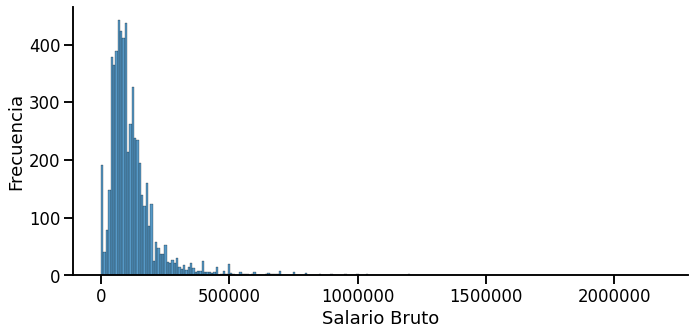

In [ ]:
# Observamos los datos en un histograma
seaborn.displot(df['salary_monthly_BRUTO'], aspect=2) 
plt.ylabel('Frecuencia')
plt.xlabel('Salario Bruto')

plt.ticklabel_format(style='plain', axis='x')
# El análisis visual sugiere que arriba de 400.000 pesos los sueldos podrían ser valores atípicos

In [ ]:
# Estudiamos los casos con salario bajo#
# ¿Por qué 9000 pesos? Hipotesis 1: ¿son salarios en USD de trabajadores remotos? 
# 9000 usd es el máximo de honorarios mensuales pagados en el exterior, según ofertas laborales en Linkedin y consultas a expertos en el área#

df_salario_atipico=df.loc[df.salary_monthly_BRUTO<9000]

In [ ]:
# Contamos la cantidad de casos en este subgrupo#
df_salario_atipico.salary_monthly_BRUTO.count()


191

In [ ]:
# Un poco más de análisis de estos aparentes atípicos en la cola izquierda de la distribución
# Solo una pequeña porcion del subgrupo son trabajadores remotos#
df_salario_atipico.work_contract_type.value_counts()


Full-Time                                                 147
Remoto (empresa de otro país)                              16
Part-Time                                                  12
Freelance                                                   9
Tercerizado (trabajo a través de consultora o agencia)      7
Name: work_contract_type, dtype: int64

In [ ]:
# Optamos por no eliminarlos ni por reexpresar en dolares sus salario, porque
# la mayoria tiene un empleo full time no remoto y por ende en pesos
# y por otro lado no podemos descartar de que sean empleados con trabajos "pro bono"

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
# 2) Eliminar valores atípicos y generar una lista de las herramientas computacionales mas populares
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
0,ninguno,Ninguno,53000.0,[ninguno]
1,html,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
2,ninguno,Ninguno,160000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
# La pregunta concreta es ¿Cuales son los lenguajes de programación asociados a los mejores salarios?
# Se podría tomar el camino de analizar solo los programas con un nivel mínimo de ocurrencias como para que el estadístico utilizaro en la inferencia sea "representativo"
# En un primer análisis exploratorio, se dejan todos los programas con al menos 29 ocurrencias dado que  #
# el tamaño mínimo de muestra que permita una inferencia "confiable" sería n ~=30 si la variable a estimar se distribuyera t-student#
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[0:5]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453


In [ ]:
# Existen alrededor de 200 lenguajes de programación (neto de errores, como por ejemplo "ninguno","no" etc#)
language_count.shape

(205, 2)

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Seleccionamos todos los lenguajes con al menos 29 ocurrencias, sin contar la categoria "ninguno" y la categoría "no"
interesting_languages = ["python", "javascript","java", "sql", "html", 'css','bash/shell', 'php','.net', 'typescript', 'c#', 'go', 'c++','c','vba', 'kotlin', 'groovy', 'ruby', 'scala', 'swift','r', 'cobol', 'abap', 'perl', 'objective-c', 'delphi', 'powershell', 'dart', 'assembler', 'actionscript', 'matlab']
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
1,html,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",130000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",130000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [ ]:
# Tamaño del dataset ajustado#
filtered_df_lang.shape

(17278, 4)

Text(0.5, 1.0, 'Distribución de los salarios por lenguaje de programación')

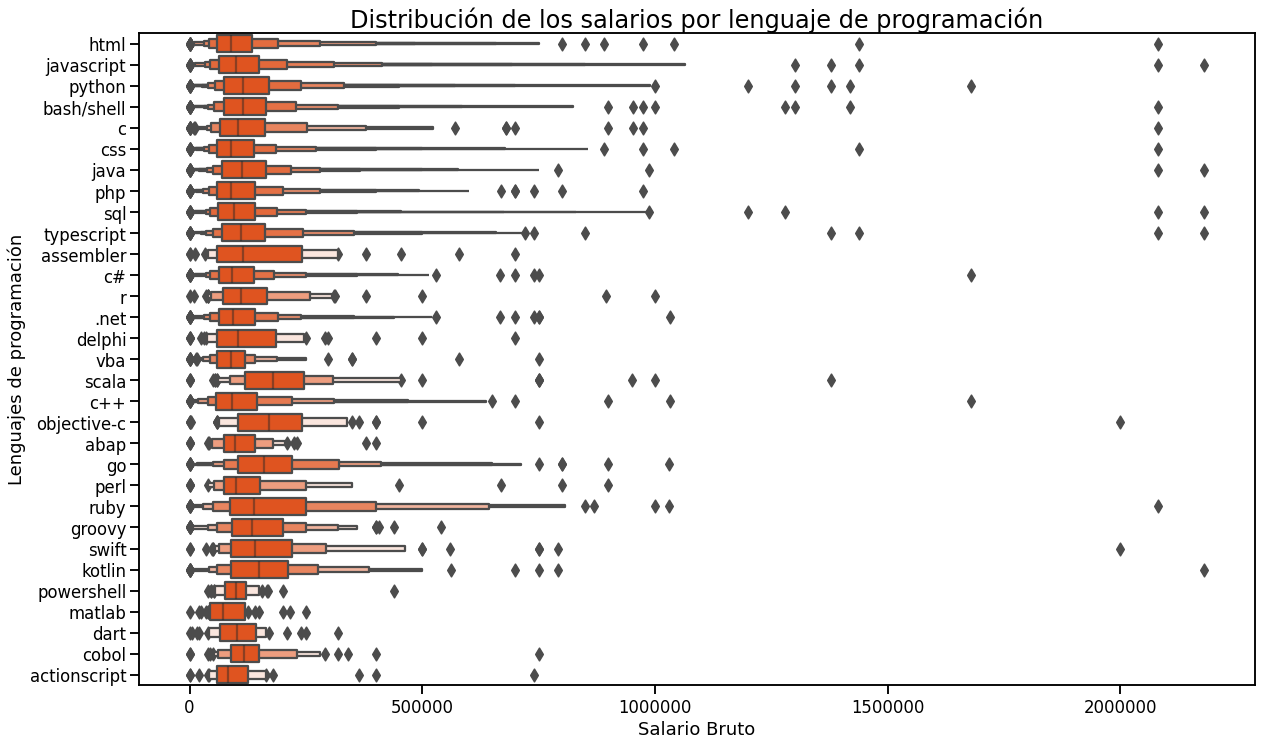

In [ ]:
# Exponemos una primera aproximación visual de la distribución de los salarios por cada lenguaje de programación,
# sin eliminar outliers de salarios (para el dataset ajustado a leguajes con al menos 29 ocurrencias)
plt.figure(figsize=(20, 12))
seaborn.boxenplot(data=filtered_df_lang, x='salary_monthly_BRUTO', y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Lenguajes de programación')
plt.xlabel('Salario Bruto')
plt.title('Distribución de los salarios por lenguaje de programación', size = 24)



In [ ]:
# Observamos el comportamiento de los posibles outliers en la cola derecha de la distribución de la variable salario mensual bruto#
k = 97
percentile_97 = filtered_df_lang['salary_monthly_BRUTO'].quantile(k / 100)
n_below = len(filtered_df_lang[filtered_df_lang['salary_monthly_BRUTO'] < percentile_97])
n_above = len(filtered_df_lang[filtered_df_lang['salary_monthly_BRUTO'] > percentile_97])
print('Percentil {} de la columna {}: {}'.format(k,'salary_monthly_BRUTO' , percentile_97))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(filtered_df_lang)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(filtered_df_lang)))

Percentil 97 de la columna salary_monthly_BRUTO: 420000.0
% de datos menor que percentil 97: 0.9697881699270748
% de datos mayor que percentil 97: 0.0296330593818729


In [ ]:
# Generamos una lista con los lenguajes con al menos 29 ocurrencias más la columna sobre la que se desea iterar#
interesting_languages2=["python", "javascript","java", "sql", "html", 'css','bash/shell', 'php','.net', 'typescript', 'c#', 'go', 'c++','c','vba', 'kotlin', 'groovy', 'ruby', 'scala', 'swift' , 'r', 'cobol', 'abap', 'perl', 'objective-c', 'delphi', 'powershell', 'dart', 'assembler', 'actionscript', 'matlab',  'salary_monthly_BRUTO' ] 

In [ ]:
# Eliminamos los 3 últimos percentiles del salario de cada lenguaje de programación, dado que suponemos que dentro de cada grupo la distribución es particular
# Consideramos que los tres ultimos percentiles eliminan los casos que más  distorsionan las medidas de 
# posición sin eliminar una parte significativa de la muestra
for col in filtered_df_lang.columns:
  if col in interesting_languages2:
   filtered_df_lang= filtered_df_lang[filtered_df_lang['salary_monthly_BRUTO'] < filtered_df_lang['salary_monthly_BRUTO'] .quantile(0.97)]

In [ ]:
filtered_df_lang.shape

(16756, 4)

In [ ]:
# Graficamos la distribución de los salarios promedio de los lenguajes con al menos 29 ocurrencias#
# Luego de eliminar outliers

Text(0.5, 1.0, 'Distribución de los salarios por lenguaje de programación')

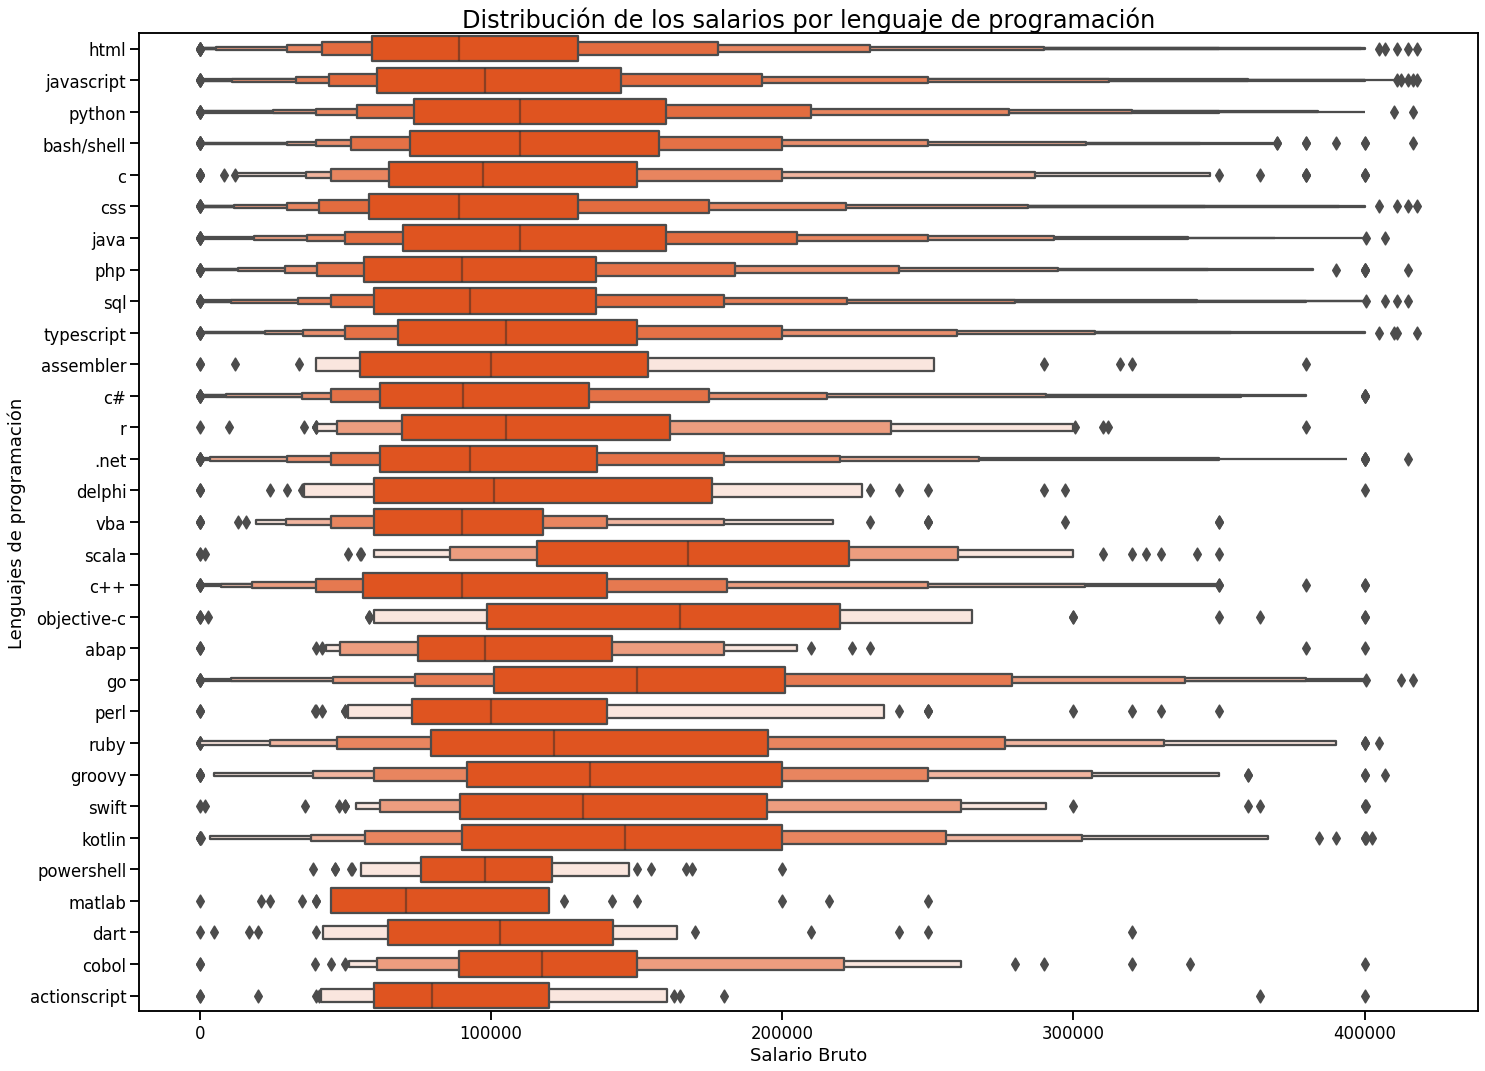

In [ ]:
plt.figure(figsize=(24, 18))
seaborn.boxenplot(data=filtered_df_lang, x='salary_monthly_BRUTO', y='programming_language',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Lenguajes de programación')
plt.xlabel('Salario Bruto')
plt.title('Distribución de los salarios por lenguaje de programación', size = 24)

In [ ]:
# Calculamos en una tabla de la mediana de los salarios de cada lenguaje de programación y los ordenamos de mayor a menor
# De esta manera tendremos una idea clara de las "distancias" entre las remuneraciones de los distintos lenguajes
# y poder ordenar de mayor a menor los mejor remunerados
df2=filtered_df_lang.groupby('programming_language').median('salary_monthly_BRUTO')
df2.sort_values('salary_monthly_BRUTO', ascending=False)

,salary_monthly_BRUTO
programming_language,
scala,167750.0
objective-c,165000.0
go,150000.0
kotlin,146000.0
groovy,134000.0
swift,131500.0
ruby,121700.0
cobol,117500.0
bash/shell,110050.0


In [ ]:
# Alternativamente, obtenemos los salarios promedio de cada programa y los ordenamos de mayor a menor
df3=filtered_df_lang.groupby('programming_language').mean('salary_monthly_BRUTO')
df3.sort_values('salary_monthly_BRUTO', ascending=False)

,salary_monthly_BRUTO
programming_language,
scala,172367.072642
objective-c,169059.729167
go,164124.042337
kotlin,153979.866870
swift,151816.250000
groovy,147959.893078
ruby,146929.356813
cobol,130971.824750
assembler,129914.291818


In [ ]:
# Nos concentrarnos en los lenguajes mejor remunerados, filtramos la base con los 5 mejor pagos según la mediana de salarios#
# Nos inclinamos por la mediana respecto del promedio, ya que es una medida más robusta
# Nos quedamos con los 5 lenguajes mejor pagos según la mediana#
df_final=df2.loc[df2.salary_monthly_BRUTO>133000]
df_final.head()

,salary_monthly_BRUTO
programming_language,
go,150000.0
groovy,134000.0
kotlin,146000.0
objective-c,165000.0
scala,167750.0


<Figure size 720x432 with 0 Axes>

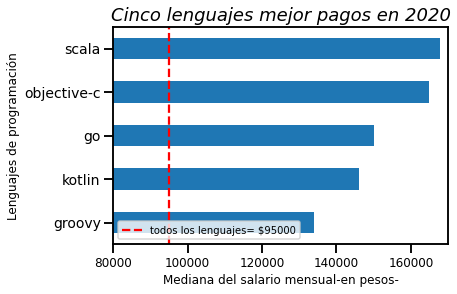

In [ ]:
# Graficamos el salario mediano de los 5 lenguajes de programación mejores pagos#
df_final= df_final.sort_values(by=['salary_monthly_BRUTO'], ascending=True)
plt.figure(figsize=(10,6))
ax = df_final.plot.barh(rot=0)
plt.title('Cinco lenguajes mejor pagos en 2020', fontsize=18,fontstyle='italic')
plt.xlabel('Mediana del salario mensual-en pesos-', fontsize=12)
plt.ylabel('Lenguajes de programación', fontsize=12)
ax.get_legend().remove()
ax.set_xlim(80000,170000)
ax.axvline(95000,color='red', linestyle="--", label='mediana de todos los lenguajes')
plt.legend("todos los lenguajes")
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
matplotlib.pyplot.legend([('todos los lenguajes= $95000')], prop={'size':10}, loc=('lower left'))
plt.show()

In [ ]:
# Los 5 lenguajes de programación mejor pagos en 2020 fueron:
# 1 Scala, 2 Objective-c, 3 go, 4 kotlin y 5 groovy
# Si tomamos como medida de posición el promedio, prácticamente no cambia el ordenamiento, solo swift pasa 
# del sexto al quinto lugar.


In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:5]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453


<Figure size 720x432 with 0 Axes>

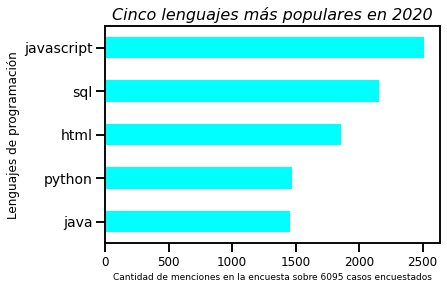

In [ ]:

language_count2=language_count[:5]
language_count2=language_count2.sort_values(by=['frequency'], ascending=True)
# Graficamos el salario mediano de los 5 lenguajes de programación mejores pagos#
plt.figure(figsize=(10,6))
ax = language_count2.plot.barh(rot=0, x='language',color=['cyan'])
plt.title('Cinco lenguajes más populares en 2020', fontsize=16, fontstyle='italic')
plt.xlabel('Cantidad de menciones en la encuesta sobre 6095 casos encuestados', fontsize=9)
plt.ylabel('Lenguajes de programación', fontsize=12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
ax.get_legend().remove()

# Notar que los 5 lenguajes más mencionados en la encuestas sysarmy, no figuran entre los 5 mejores pagos


[texto del enlace](https://)

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [ ]:
df4=df.loc[:,['profile_years_experience', 'work_contract_type', 'profile_age', 'salary_monthly_BRUTO', 'salary_in_usd']] 



In [ ]:
df4.salary_in_usd.value_counts()


Mi sueldo está dolarizado    676
Name: salary_in_usd, dtype: int64

In [ ]:
df_salario_usd=df4.loc[df4.salary_in_usd=="Mi sueldo está dolarizado"]

In [ ]:
df_salario_usd['salary_monthly_BRUTO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count        676.00
mean      261119.12
std       225551.83
min            2.00
25%       119805.00
50%       195500.00
75%       350000.00
max      2080000.00
Name: salary_monthly_BRUTO, dtype: object

In [ ]:
# Buscamos outliers en el subgrupo de los que ganan un salario en dólares#
df_salario_usd['salary_monthly_BRUTO'].quantile([.95,.96,.97, .98, .99, .995, .998])




0.950     672500.0
0.960     700000.0
0.970     787500.0
0.980     897000.0
0.990    1033437.5
0.995    1348500.0
0.998    1595685.0
Name: salary_monthly_BRUTO, dtype: float64

Text(0.5, 15.440000000000026, 'Salario Bruto')

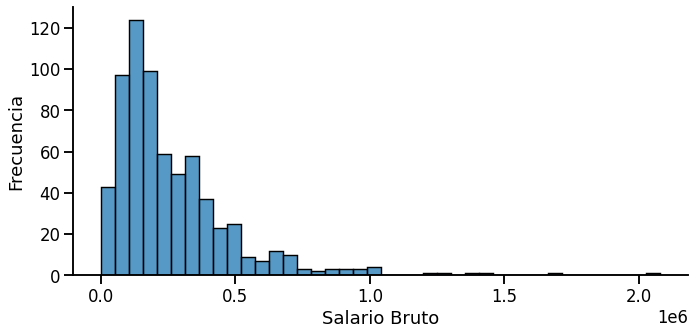

In [ ]:
# Observamos los datos en un histograma
seaborn.displot(df_salario_usd['salary_monthly_BRUTO'], aspect=2)

plt.ylabel('Frecuencia')
plt.xlabel('Salario Bruto')

In [ ]:
# Eliminamos el 3% de los datos ubicados a la derecha de la distribución para reducir el impacto en las medidas de posición#
df_salario_usd= df_salario_usd[df_salario_usd['salary_monthly_BRUTO'] < df_salario_usd['salary_monthly_BRUTO'] .quantile(0.97)]

In [ ]:
df_salario_usd['salary_monthly_BRUTO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       655.00
mean     234560.42
std      162915.33
min           2.00
25%      115800.00
50%      190000.00
75%      331550.00
max      750000.00
Name: salary_monthly_BRUTO, dtype: object

In [ ]:
# Eliminamos outliers en toda la muestra#
df4['salary_monthly_BRUTO'].quantile([.95,.96,.97, .98, .99, .995, .998])

0.950     307150.0
0.960     350000.0
0.970     400000.0
0.980     480000.0
0.990     630600.0
0.995     796240.0
0.998    1032671.0
Name: salary_monthly_BRUTO, dtype: float64

Text(0.5, 0, 'Salario Bruto')

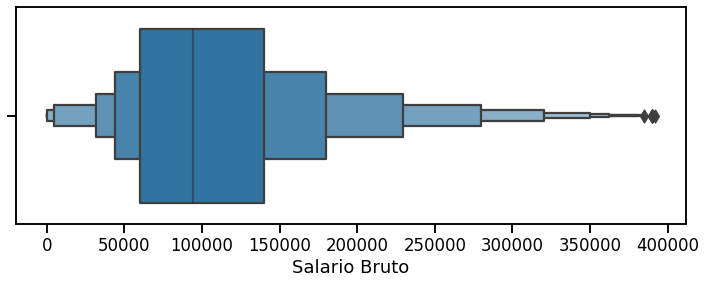

In [ ]:
plt.figure(figsize=(12, 4))
max_limit = df4['salary_monthly_BRUTO'].quantile(.97)
seaborn.boxenplot(x=df4[df4['salary_monthly_BRUTO'] < max_limit]['salary_monthly_BRUTO'])

plt.xlabel('Salario Bruto')
# El 50% de los encuestado obtiene un salario mensual promedio que oscila entre 60000 y 140000 pesos, mientras que el encuestado mediano 
# cobra un salario cercano a 96.000 pesos# 

In [ ]:
df4.shape

(6095, 5)

In [ ]:
df5= df4[df4['salary_monthly_BRUTO'] < df4['salary_monthly_BRUTO'] .quantile(0.97)]

In [ ]:
df5.shape

(5903, 5)

In [ ]:
# ELIMINAMOS EL CASO CON 110 AÑOS DE EXPERIENCIA#
df5=df5.loc[(df5.profile_years_experience<50)]

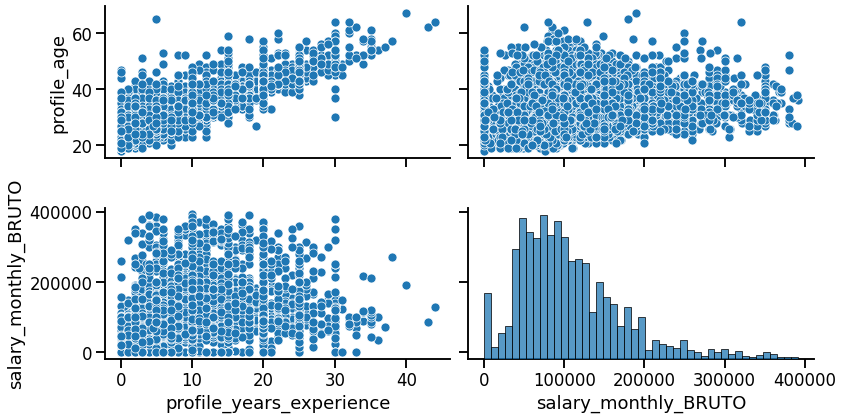

In [ ]:
max_age = 99
seaborn.pairplot(data=df5[df5.profile_age < max_age],
                 y_vars=['profile_age', 'salary_monthly_BRUTO'],
                 x_vars=['profile_years_experience', 'salary_monthly_BRUTO'],
                 aspect=2, height=3)

# No se observa una fuerte correlación entre experiencia y salario o entre edad y salario#
# Existen algunas inconsistencias en la base, dado que hay gente que tiene más años de experiencia que edad

<Figure size 576x288 with 0 Axes>

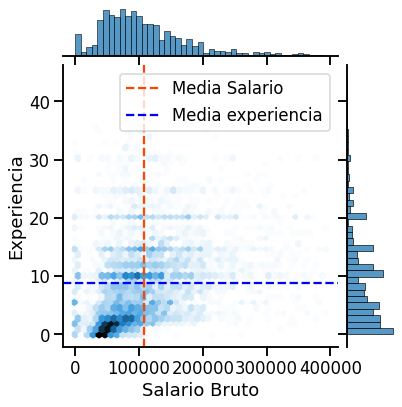

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.jointplot(data=df5[df5.profile_age < max_age], x='salary_monthly_BRUTO',
                  y='profile_years_experience', kind='hex', height=6) 
plt.axvline(df5[df5.profile_age < max_age]['salary_monthly_BRUTO'].mean(), color='orangered',
            linestyle='--', label='Media Salario')
plt.axhline(df5[df5.profile_age < max_age]['profile_years_experience'].mean(), color='blue',
            linestyle='--', label='Media experiencia')
plt.legend()

plt.ylabel('Experiencia')
plt.xlabel('Salario Bruto')

plt.ticklabel_format(style='plain', axis='y')
# El salario promedio de la encuesta se encuentra apenas por encima de los 100000 pesos
# Los años promedio de experiencia de los encuestados es de alrededor de 9 años
# Este gráfico si sugiere una tenue relación positiva entre salario y experiencia, con características
# de una industria joven, donde la mayoría tiene pocos años de experiencia#

<Figure size 576x288 with 0 Axes>

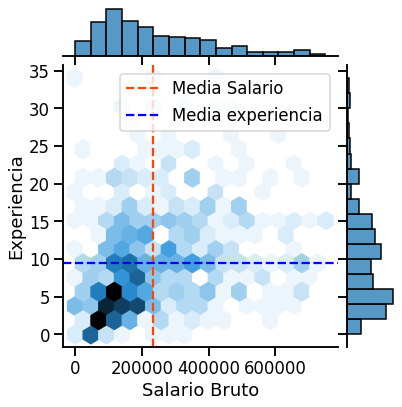

In [ ]:
# Ahora aplicamos mismo análisis pero para el SUBGRUPO DE TRABAJADORES QUE COBRAN EN DÓLARES (sin contar outliers)#
fig = plt.figure(figsize=(8,4))
seaborn.jointplot(data=df_salario_usd[df_salario_usd.profile_age < max_age], x='salary_monthly_BRUTO',
                  y='profile_years_experience', kind='hex', height=6) 
plt.axvline(df_salario_usd[df_salario_usd.profile_age < max_age]['salary_monthly_BRUTO'].mean(), color='orangered',
            linestyle='--', label='Media Salario')
plt.axhline(df_salario_usd[df_salario_usd.profile_age < max_age]['profile_years_experience'].mean(), color='blue',
            linestyle='--', label='Media experiencia')
plt.legend()

plt.ylabel('Experiencia')
plt.xlabel('Salario Bruto')

plt.ticklabel_format(style='plain', axis='y')
# Notar que el promedio salarial de los que cobran en dólares es el doble de la muestra general, sucede algo similar con la medina#
# No se observan variaciones significativas en la cantidad promedio de años de experiencia entre estre grupo y la muestra total#
# Aunque, a diferencia de la muestra general, se aprecia que no hay prevalencia de trabajadores con poca experiencia (1 o 2 años)


## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Text(0.5, 0, 'Salario Bruto')

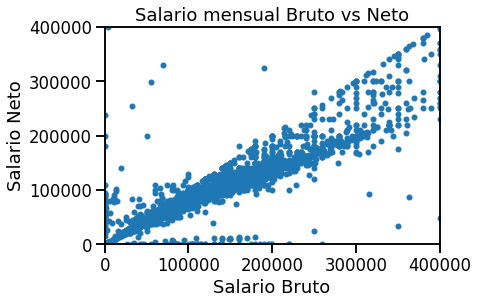

In [ ]:

df.plot.scatter(x='salary_monthly_BRUTO',
                y='salary_monthly_NETO',
                ylim=(0,400000),
                xlim=(0,400000),
                title=('Salario mensual Bruto vs Neto')
)
plt.ylabel('Salario Neto')
plt.xlabel('Salario Bruto')

# El análisis gráfico sugiere una relación lineal positiva entre salario neto y bruto, tambien 
# muestra inconsistencias, no deberia haber gente con salario neto mayor al bruto#


In [ ]:
df['salary_monthly_BRUTO'].corr(df['salary_monthly_NETO'])
# Hay una relación lineal positiva de 0.83, notar que es muy parecido al porcentaje de descuentos por obra social y jubilacion
# Respecto del objetivo del trabajo, el coeficiente de correlación lineal parece sugerir que 
# en promedio el salario neto es el 83% del salario bruto, parecería "trabajar bien"
# pero, antes de tomar la decisión de eliminar la columna de salario bruto, estudiaríamos
# los casos inconsistentes para saber que características tienen.
# No eliminaríamos ninguna columna, a priori por reazones explicadas arriba, por lo que sugerimos trabajar con el salario bruto y 
# parecería ser razonable trabajar con casos en que el salario neto sea menor al salario bruto, esto explicaría también porque 
# no eliminaríamos el salario NETO.




0.8333351176300585

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
df6=df.loc[:,[ 'profile_studies_level', 'salary_monthly_NETO']] 

In [ ]:
df6.profile_studies_level.value_counts()

Universitario    4133
Terciario        1135
Secundario        449
Posgrado          342
Doctorado          30
Posdoctorado        4
Primario            2
Name: profile_studies_level, dtype: int64

In [ ]:
# Cortamos la muestra en universitario o más ya que universitarios son el 60% de la muestra y agruparlos con los que tienen mayor nivel
# educativo es razonable (además son pocos), mientras que , de terciario para abajo consideramos que están un escalón abajo.

df6['universitario_o_mas']="no universitario"
mask = ((df6.profile_studies_level=='Universitario') | (df6.profile_studies_level=='Posgrado') | (df6.profile_studies_level=='Doctorado') | (df6.profile_studies_level=='Posdoctorado'))
column_name = 'universitario_o_mas'
df6.loc[mask,column_name] = "universitario_o_mas" 

Text(-21.310000000000002, 0.5, 'Salario Bruto')

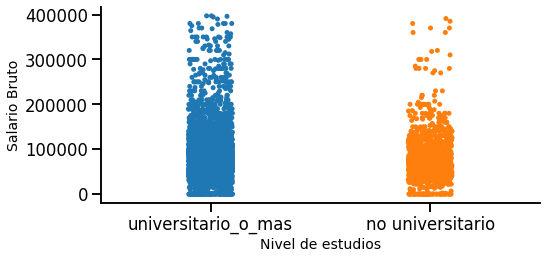

In [ ]:
seaborn.catplot(data=df6[df6.salary_monthly_NETO < 400000], y='salary_monthly_NETO',  
                x='universitario_o_mas', height=4, aspect=2)
plt.xlabel('Nivel de estudios', fontsize=14)
plt.ylabel('Salario Bruto', fontsize=14)

In [ ]:

df7= df6[df6['salary_monthly_NETO'] < df6['salary_monthly_NETO'] .quantile(0.97)]


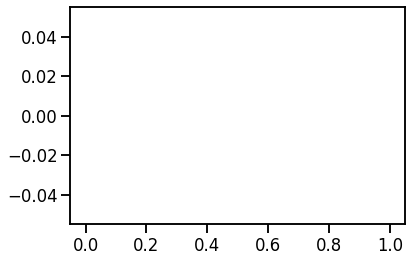

Text(0.5, 0, 'Salario Neto')

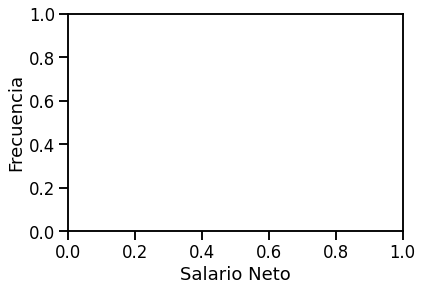

In [ ]:
df_UNIV=df7[df7['universitario_o_mas']==1]
df_NOUNIV=df7[df7['universitario_o_mas']==0]

plt.hist(df_UNIV['salary_monthly_NETO'], color='grey', bins=50)
plt.hist(df_NOUNIV['salary_monthly_NETO'], color='steelblue', bins=50) 
plt.axvline(df_NOUNIV.salary_monthly_NETO.median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(df_UNIV.salary_monthly_NETO.median(), color='black', linestyle='dashed', linewidth=1)
plt.show()

plt.ylabel('Frecuencia')
plt.xlabel('Salario Neto')

# Si bien las distribuciones de salarios son similares, se puede observar que ganan más los trabajadores con nivel educativo universitario o mas#

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


In [ ]:
df5.head()
# Seleccionamos tipo de contrato, años de experiencia y salario bruto#

,profile_years_experience,work_contract_type,profile_age,salary_monthly_BRUTO,salary_in_usd
0,3.0,Full-Time,26,53000.0,NaN
1,5.0,Full-Time,29,79000.0,NaN
2,2.0,Full-Time,22,160000.0,NaN
3,15.0,Full-Time,39,130000.0,NaN
4,9.0,Full-Time,32,140000.0,NaN


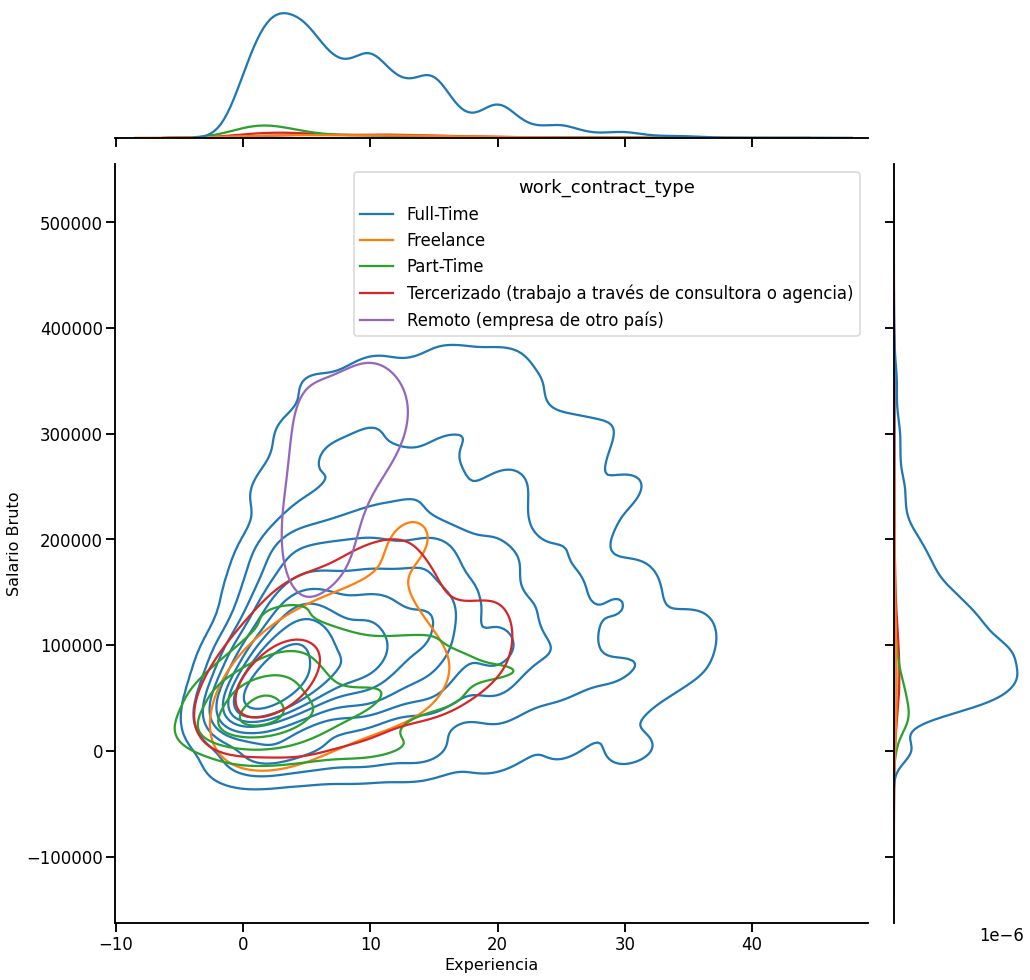

In [ ]:
ax= seaborn.jointplot(data=df5[df5.profile_years_experience < 50], x='profile_years_experience', y='salary_monthly_BRUTO',
                      hue='work_contract_type', 
                      kind='kde',
                      height=14, )

ax.set_axis_labels('Experiencia', 'Salario Bruto', fontsize=16)


# Seleccionamos este gráfico de distribución conjunta dado que permite apreciar con mayor nitidez las diferencias en la  distribución 
# conjunta de salario y años de experiencia entre grupos, ejemplo notar que en el caso de trabajo Remoto ganan significativamente mas 
# que el resto de grupos  e incluso se infiere que los años de experiencia no explican en forma significativa esta diferencia salarial.
# Existe un grupo que tiene un salario mensual bruto significativamente mayor y es el grupo de personas que trabajan en remoto para otro pais
